## Objective
 * In the notebook, we will show the perceptron a bunch of cards, organized into decks. 
 * Each card has either a horizontal partition or a vertical partition


In [27]:
from mm_include import mm,mermaid

In [28]:
mm("""
flowchart LR
    subgraph Inputs["Inputs"]
        A1["$$ x_1$$"]
        A2["$$ x_2$$"]
        ADOT[".."]
        AN["$$ x_n$$"]
    end
    subgraph subGraph1["Weights"]
        w1(("$$ w_1 $$"))
        w2(("$$ w_2 $$"))
        wDOT[".."]
        wN(("$$ w_n $$"))
    end
    C{"$$ z = \sum_{i=1}^n x_i w_i + b $$"}
    y["output"]
    step["$$\phi(z) \\text{\ 'step function'}$$"]

    %% Comments after double percent signs
    A1 --> w1 
    w1--> C
    A2 --> w2
    w2 --> C
    ADOT --> wDOT
    wDOT --> C
    AN --> wN
    wN --> C
    C --> step
    step ==> y
""")

#### The 2 key functions are a weighted sum and a step function
$$ 
    z = \sum_{i=1}^n x_i w_i + b 
$$

$$ 
    output = \begin{cases}
        1 & \text{if }\ z > T \text{\, where T is some threshold }
        \\-1 & \text{otherwise}
        \end{cases}     
$$

In [15]:
import numpy as np
import copy
import numpy as np
from matplotlib import pyplot as plt
import random
%matplotlib inline

In [16]:
#generate a training card with a rectangular section marked positive 
def training_card(size=8, horizontal_partition = True, vertical_partition = True):
    Y = np.zeros(size*size)    
    s = 0
    t_y = random.uniform(size/4,3*size/4) if horizontal_partition else -1
    t_x = random.uniform(0,size) if vertical_partition else -1  
    for i in range (0,size):    
        for j in range (0,size):
            Y[s]= 1 if (j> t_y and i>t_x) else -1
            s+=1
    return Y            

def draw_card(Y,size=8):
    plt.figure(figsize=(2,2))   
    s =0
    for i in range (0,size):    
        for j in range (0,size):
            # Plot the positive samples            
            if Y[s] > 0:
                plt.scatter(i, j, s=50, marker='s', color='green',linewidths=2)
            # Plot the negative samples
            else:
                plt.scatter(i, j, s=50, marker='s', color='red', linewidths=2)
            s += 1     
    plt.show()

        

In [17]:
def draw_and_print(x,y,a):
    # show card
    print(f"Prediction: {'Horizontal' if a > 0 else 'Vertical'} ({a}) GT:{'Horizontal' if y > 0 else 'Vertical'}({y})")
    draw_card(x)

In [13]:
import sys, site
sys.path.insert(0,"..") 
from perceptron import perceptron as tron

Mismatch
Prediction: Vertical (0.0) GT:Horizontal(1)


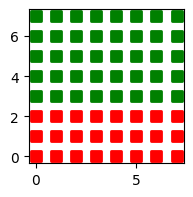

Mismatch
Prediction: Vertical (0.0) GT:Vertical(-1)


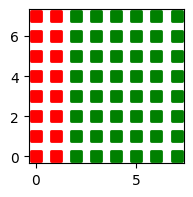

Prediction Errors:2
CONVERGENCE (epoch:1)


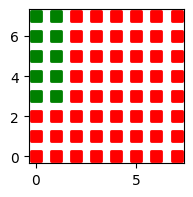

Weights => [ 0.  0.  0.  2.  2.  2.  2.  2.  0.  0.  0.  2.  2.  2.  2.  2. -2. -2.
 -2.  0.  0.  0.  0.  0. -2. -2. -2.  0.  0.  0.  0.  0. -2. -2. -2.  0.
  0.  0.  0.  0. -2. -2. -2.  0.  0.  0.  0.  0. -2. -2. -2.  0.  0.  0.
  0.  0. -2. -2. -2.  0.  0.  0.  0.  0.], bias=0
----------------------------------------

Mismatch
Prediction: Horizontal (4.0) GT:Vertical(-1)


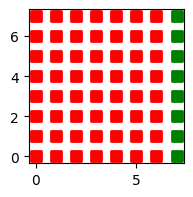

Prediction: Horizontal (32.0) GT:Horizontal(1)


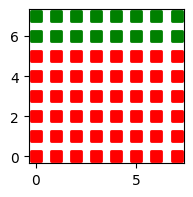

Prediction Errors:1
CONVERGENCE (epoch:1)


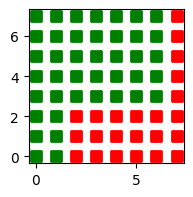

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-41.0) GT:Vertical(-1)


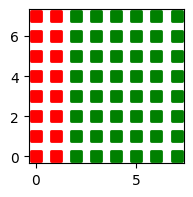

Prediction: Vertical (-53.0) GT:Vertical(-1)


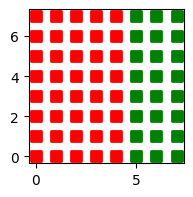

Prediction Errors:0
CONVERGENCE (epoch:0)


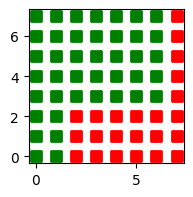

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Horizontal (7.0) GT:Horizontal(1)


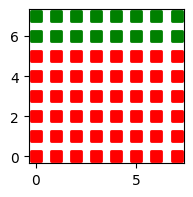

Prediction: Horizontal (27.0) GT:Horizontal(1)


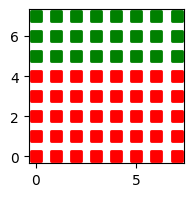

Prediction Errors:0
CONVERGENCE (epoch:0)


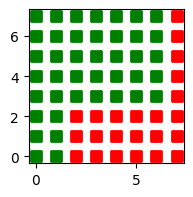

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-33.0) GT:Vertical(-1)


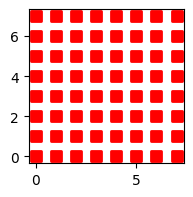

Prediction: Horizontal (47.0) GT:Horizontal(1)


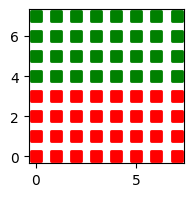

Prediction Errors:0
CONVERGENCE (epoch:0)


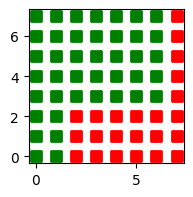

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-33.0) GT:Vertical(-1)


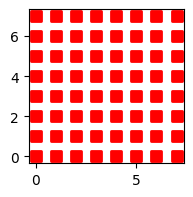

Prediction: Horizontal (7.0) GT:Horizontal(1)


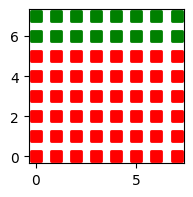

Prediction Errors:0
CONVERGENCE (epoch:0)


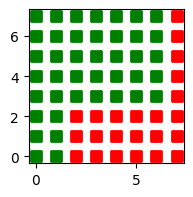

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-61.0) GT:Vertical(-1)


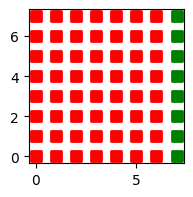

Prediction: Horizontal (27.0) GT:Horizontal(1)


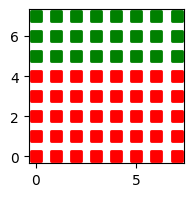

Prediction Errors:0
CONVERGENCE (epoch:0)


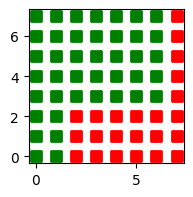

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Horizontal (7.0) GT:Horizontal(1)


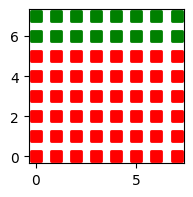

Prediction: Vertical (-41.0) GT:Vertical(-1)


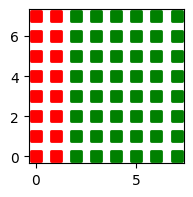

Prediction Errors:0
CONVERGENCE (epoch:0)


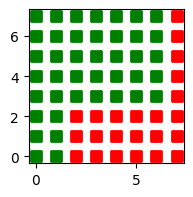

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-57.0) GT:Vertical(-1)


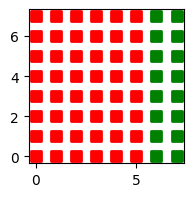

Prediction: Vertical (-41.0) GT:Vertical(-1)


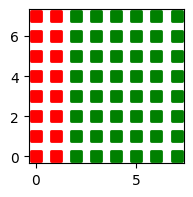

Prediction Errors:0
CONVERGENCE (epoch:0)


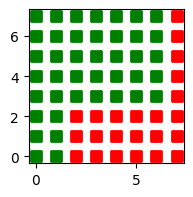

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------

Prediction: Vertical (-41.0) GT:Vertical(-1)


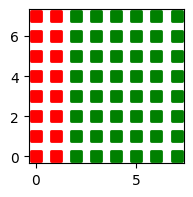

Prediction: Vertical (-45.0) GT:Vertical(-1)


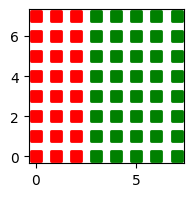

Prediction Errors:0
CONVERGENCE (epoch:0)


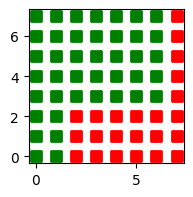

Weights => [ 1.  1.  1.  3.  3.  3.  3.  3.  1.  1.  1.  3.  3.  3.  3.  3. -1. -1.
 -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1.
  1.  1. -3. -3. -3. -1. -1. -1. -1. -1.], bias=-1
----------------------------------------



In [18]:


#generate 10 cards and train to detect horizontal partitions     
size = 8
num_cards = 2
num_decks = 10

#initialize weights
weights = np.zeros(size*size)
bias = 0


for decks in range (0,num_decks):
    #store a new deck of cards in X and Y
    X_64 = []
    Y_64= []
    for c in range (0,num_cards):
        #horizontal cards are positive, vertical cards are negative 
        y = round(random.uniform(0,1))
        h = bool(y)
        v = not bool(y)
        y = -1 if not y else 1
        #print(f"Create card (y:{y},h:{h},v:{v})")
        Y = training_card(size=size,horizontal_partition=h,vertical_partition=v)        
        X_64.append(Y)
        Y_64.append(y)

    #train on the deck and count 
    (weights,bias) = tron.perceptron(X_64,Y_64, weights, bias, predict=True, debug_function = draw_and_print)
    draw_card(weights)
    print(f"Weights => {weights}, bias={bias}\n{'-'*40}\n")